# Import the libraries

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the input datasets

In [250]:
holidays_df = pd.read_csv('../data/holidays_events.csv')
oil_prices_df = pd.read_csv('../data/oil.csv')
stores_info_df = pd.read_csv('../data/stores.csv')
transactions_by_stores_df = pd.read_csv('../data/transactions.csv')
train_df = pd.read_csv('../data/train.csv')

# EDA on the training dataset

In [251]:
train_df.head(1)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0


In [253]:
train_df.rename(columns = {'id': 'product_id', 
                 'family': 'product_family', 
                 'sales': 'total_sales_by_product'}, inplace = True)
train_df.head()

,product_id,date,store_nbr,product_family,total_sales_by_product,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [254]:
train_df.shape

(3000888, 6)

In [255]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   date                    object 
 2   store_nbr               int64  
 3   product_family          object 
 4   total_sales_by_product  float64
 5   onpromotion             int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [256]:
train_df.agg(['count', 'size', 'nunique']) # size inclues NaN/null values and count does not

,product_id,date,store_nbr,product_family,total_sales_by_product,onpromotion
count,3000888,3000888,3000888,3000888,3000888,3000888
size,3000888,3000888,3000888,3000888,3000888,3000888
nunique,3000888,1684,54,33,379610,362


# Check for missing values

In [257]:
train_df.isnull().sum()

product_id                0
date                      0
store_nbr                 0
product_family            0
total_sales_by_product    0
onpromotion               0
dtype: int64

# Check if there are any invalid values for columns with dtype String

In [258]:
list(train_df.dtypes[train_df.dtypes == object].index)

['date', 'product_family']

In [259]:
for col in list(train_df.dtypes[train_df.dtypes == object].index):
    print('Column Name: ', col)
    print(train_df[col].unique())

Column Name:  date
['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
Column Name:  product_family
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


# Check correlation between the variables

<AxesSubplot:>

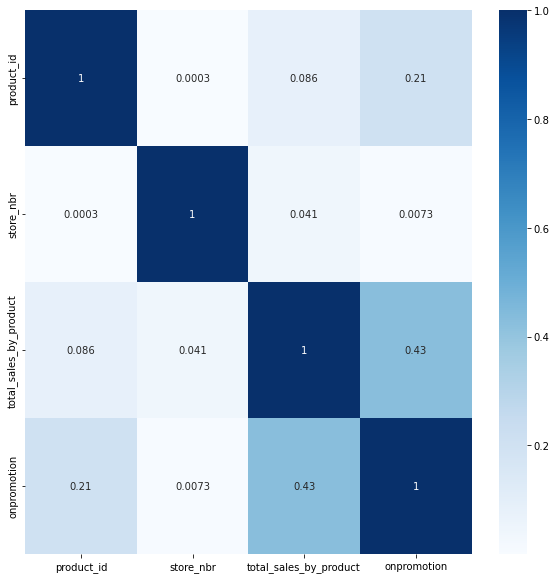

In [265]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), cbar=True, annot=True, cmap='Blues')

### From the above heatmap, none of the features are highly correlated

# Relationship between total sales and number of items on promotion

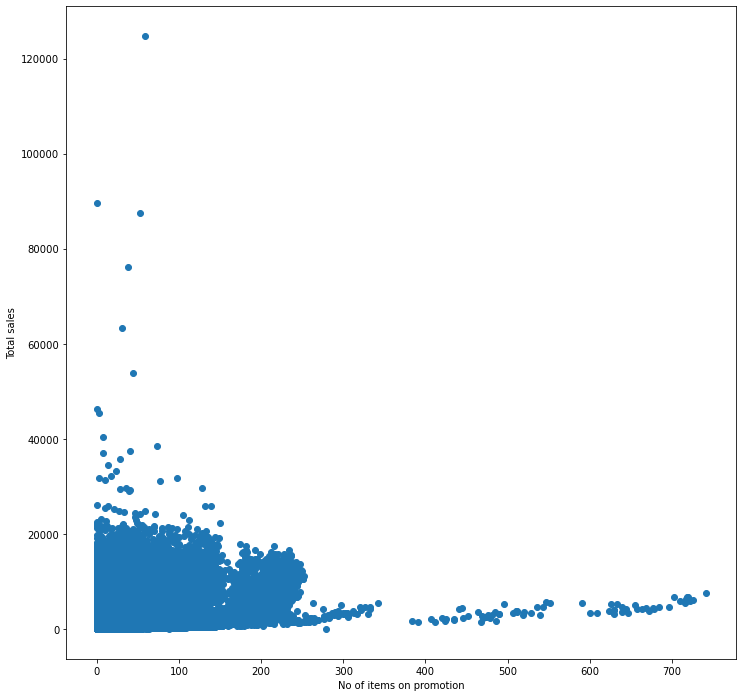

In [266]:
plt.figure(figsize=(12, 12))
plt.scatter(x='onpromotion', y='total_sales_by_product', data=train_df)
plt.xlabel('No of items on promotion')
plt.ylabel('Total sales')
plt.show()

# EDA on the oil dataset

In [267]:
oil_prices_df.shape

(1218, 2)

In [268]:
oil_prices_df.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [269]:
oil_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [270]:
oil_prices_df.agg(['count', 'size', 'nunique'])

,date,dcoilwtico
count,1218,1175
size,1218,1218
nunique,1218,998


# Check for missing values

In [271]:
oil_prices_df.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

# Visualize missing data using Heatmap

<AxesSubplot:>

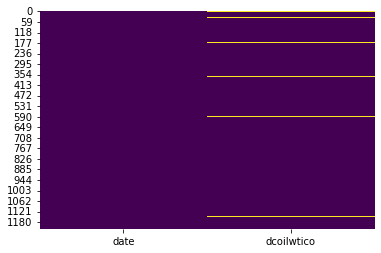

In [272]:
sns.heatmap(oil_prices_df.isnull(),cbar=False,cmap='viridis')

# Replace the missing values with mean

In [273]:
mean_oil_price_value = oil_prices_df['dcoilwtico'].mean()

oil_prices_df['dcoilwtico'].fillna(value=mean_oil_price_value, inplace=True)

In [274]:
oil_prices_df.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

# EDA on the stores dataset

In [275]:
stores_info_df.shape

(54, 5)

In [276]:
stores_info_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [277]:
stores_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [278]:
stores_info_df.agg(['size', 'count', 'nunique'])

,store_nbr,city,state,type,cluster
size,54,54,54,54,54
count,54,54,54,54,54
nunique,54,22,16,5,17


### Check if there are any invalid values for columns with dtype String

In [190]:
for col in list(stores_info_df.dtypes[stores_info_df.dtypes == object].index):
        print('Column Name: ', col)
        print(stores_info_df[col].unique())

Column Name:  city
['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']
Column Name:  state
['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']
Column Name:  type
['D' 'B' 'C' 'E' 'A']


In [279]:
stores_info_df.rename(columns = {'city': 'store_location_city', 
                                 'state': 'store_location_state', 
                                 'type': 'store_type',
                                 'cluster': 'store_cluster'}, inplace = True)
stores_info_df.head()

,store_nbr,store_location_city,store_location_state,store_type,store_cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# EDA on the transactions dataset

In [280]:
transactions_by_stores_df.shape

(83488, 3)

In [281]:
transactions_by_stores_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [282]:
transactions_by_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [283]:
transactions_by_stores_df.agg(['size', 'count', 'nunique'])

,date,store_nbr,transactions
size,83488,83488,83488
count,83488,83488,83488
nunique,1682,54,4993


# EDA on the holidays dataset

In [284]:
holidays_df.shape

(350, 6)

In [285]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [286]:
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [287]:
holidays_df.agg(['size', 'count', 'nunique'])

,date,type,locale,locale_name,description,transferred
size,350,350,350,350,350,350
count,350,350,350,350,350,350
nunique,312,6,3,24,103,2


In [288]:
holidays_df['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

# Check for the transferred holidays as per the dataset description

In [289]:
holidays_df[holidays_df['type'] == 'Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [290]:
holidays_df[holidays_df['transferred'] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


### According to the dataset description, transferred holidays were observed on a different date so they can be treated as a normal date and filtered out from the holidays 

# Filter out the transferred holidays

In [291]:
holidays_df = holidays_df[holidays_df['transferred'] == False]

In [292]:
holidays_df.shape

(338, 6)

# Check the relationship between Bridge and Work Day

In [293]:
holidays_df[holidays_df['type'] == 'Work Day']

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [294]:
holidays_df[holidays_df['type'] == 'Bridge']

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


# Work day were not observed as holiday to cover up for the extra holidays for the long weekend so they can be removed from the dataset

In [295]:
holidays_df = holidays_df[holidays_df['type'] != 'Work Day']

In [296]:
holidays_df.shape

(333, 6)

In [314]:
holidays_df['is_holiday'] = True

# Check for duplicates

In [360]:
holidays_df['date'].value_counts()

2014-06-25    4
2016-06-25    3
2015-06-25    3
2017-06-25    3
2012-06-25    3
             ..
2014-08-10    1
2014-08-15    1
2014-08-24    1
2014-09-28    1
2017-12-26    1
Name: date, Length: 296, dtype: int64

In [361]:
holidays_df[holidays_df['date'].isin(['2014-06-25', '2016-06-25', '2015-06-25'])]

,date,type,locale,locale_name,description,transferred,is_holiday
110,2014-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,True
111,2014-06-25,Holiday,Local,Machala,Fundacion de Machala,False,True
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,True
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False,True
176,2015-06-25,Holiday,Local,Machala,Fundacion de Machala,False,True
177,2015-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,True
178,2015-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,True
258,2016-06-25,Holiday,Local,Machala,Fundacion de Machala,False,True
259,2016-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,True
260,2016-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,True


# Drop the duplicates by date

In [369]:
holidays_df = holidays_df.drop_duplicates(subset=['date'], keep='first')

In [370]:
holidays_df.shape

(296, 7)

# Join all the other datasets to Training dataset

In [373]:
train_w_attr_df = train_df.merge(oil_prices_df, on='date', how='left')\
                          .merge(stores_info_df, on='store_nbr', how='left')\
                          .merge(stores_info_df, on='store_nbr', how='left')\
                          .merge(transactions_by_stores_df, on=['date', 'store_nbr'], how='left')\
                          .merge(holidays_df[['date', 'is_holiday']], on='date', how='left')

In [374]:
train_w_attr_df.shape

(3000888, 17)

In [375]:
train_w_attr_df.head()

,product_id,date,store_nbr,product_family,total_sales_by_product,onpromotion,dcoilwtico,store_location_city_x,store_location_state_x,store_type_x,store_cluster_x,store_location_city_y,store_location_state_y,store_type_y,store_cluster_y,transactions,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,67.714366,Quito,Pichincha,D,13,Quito,Pichincha,D,13,NaN,True
1,1,2013-01-01,1,BABY CARE,0.0,0,67.714366,Quito,Pichincha,D,13,Quito,Pichincha,D,13,NaN,True
2,2,2013-01-01,1,BEAUTY,0.0,0,67.714366,Quito,Pichincha,D,13,Quito,Pichincha,D,13,NaN,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,67.714366,Quito,Pichincha,D,13,Quito,Pichincha,D,13,NaN,True
4,4,2013-01-01,1,BOOKS,0.0,0,67.714366,Quito,Pichincha,D,13,Quito,Pichincha,D,13,NaN,True


# Perfrom data cleaning on the final training dataset